In [56]:
import os
import os
import re
import sys
import pandas as pd
#netflow = '../../data/netflow_day-02.hdf5'
#print(sys.path)
import seaborn as sns
import matplotlib.pyplot as plt

### Connect to arkouda server

In [34]:
import arkouda as ak
ak.connect(server='localhost',port='5555')

### Run check.py to generate output from arkouda server

### Parse arkouda server log file

In [111]:
#testfile = open('../ak.log')
#txt = testfile.read()
#print(txt)
with open('../ak.log') as log:
    line = log.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt,line.strip()))
        #print("{}: {}".format(cnt,line.strip()))
        line = log.readline()
        cnt += 1
        if "<<<" in line:
            #print(line.split()[1])
            with open('functions.csv','a') as fcn:
                function = line.split()[1]
                seconds = line.split()[3]
                if seconds.endswith('sec'):
                    seconds = seconds[:-3]
                fcn.write(function + ',' + seconds +'\n')

### Log file dataframe

In [132]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
d = pd.read_csv("functions.csv")
log = pd.DataFrame(data=d)
log.columns = ['function','seconds']
log
#df.plot()
#f = open('../ak.log','r')
#file_contents = f.read()
#print(file_contents)
#f.close()

,function,seconds
0,arange,0.000482
1,array,0.000201
2,binopvv,0.000262
3,tondarray,0.000075
4,create,0.000178
5,set,0.000195
6,delete,0.000140
7,[slice]=val,0.000248
8,str,0.000181
9,create,0.000121


### Plot Function Execution Times (Without Log Scale)

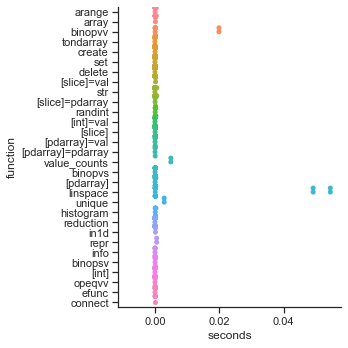

In [130]:
#dim10by8 = (10, 8)
#fig, ax = plt.subplots(figsize=dim10by8);
#fs = sns.catplot(x="seconds",y="function",kind="swarm", hue = "seconds", ax=ax, data=log)
#fs = sns.catplot(x="seconds",y="function",kind="swarm", ax=ax, data=log)
#axes = plt.gca()
#axes.set_xlim([0,100])
sns.set(style="ticks",color_codes=True)
#sns.set(style="whitegrid")
sns.catplot(x="seconds",y="function",kind="swarm", data=log)

### Function Execution Times in High Density Millisecond Range

In [128]:
logm = log * [1,100000]
logm.columns = ['function','Milliseconds']
#logm;
#axes = plt.gca()
#axes.set_xlim([5,20])
g = sns.catplot(x="Milliseconds",y="function",kind="swarm", data=logm, ax = axes)
g = (g.set_axis_labels("Tip","Total bill(USD)").
set(xlim=(5,20))
plt.title("title")
plt.show(g)

SyntaxError: invalid syntax (<ipython-input-128-c4e2155a378f>, line 9)

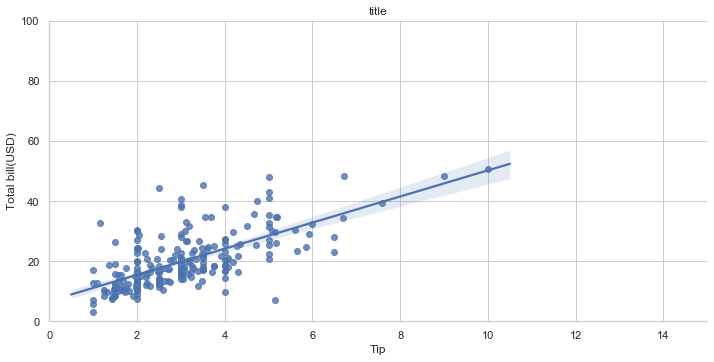

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
tips = sns.load_dataset("tips")
sns.set_style("whitegrid")
g = sns.lmplot(x="tip", y="total_bill", data=tips,aspect=2)
g = (g.set_axis_labels("Tip","Total bill(USD)").
set(xlim=(0,15),ylim=(0,100)))
plt.title("title")
plt.show(g)

In [23]:
tips = sns.load_dataset("tips")
tips
#sns.catplot(x="day",y="total_bill",data=tips);

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
# Regex used to match relevant loglines (in this case, a specific IP address)
line_regex = re.compile(r".*fwd=\"12.34.56.78\".*$")

In [4]:
# Output file, where the matched loglines will be copied to
output_filename = os.path.normpath("ak.log")
# Overwrites the file, ensure we're starting out with a blank file
with open(output_filename, "w") as out_file:
    out_file.write("")

In [ ]:
# Open output file in 'append' mode
with open(output_filename, "a") as out_file:
    # Open input file in 'read' mode
    with open("test_log.log", "r") as in_file:
        # Loop over each log line
        for line in in_file:
            # If log line matches our regex, print to console, and output file
            if (line_regex.search(line)):
                print line
                out_file.write(line)

In [19]:
a = ak.ones(500000)

In [20]:
#print(a.name)
print(ak.info(a))

name:"id_1" dtype:"float64" size:500000 ndim:1 shape:(500000) itemsize:8



Read Log File

In [17]:
infile = '../ak.log"

SyntaxError: EOL while scanning string literal (<ipython-input-17-62b1ab167d08>, line 1)

In [ ]:
print(infile)

In [ ]:

important = []
keep_phrases = ["test",
              "important",
              "keep me"]

with open(infile) as f:
    f = f.readlines()

for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            important.append(line)
            break

print(important)

In [ ]:
from glob import glob
import os
allfiles=glob(os.path.join(netflow, '*/*abc*.df'))
Columns = ['srcIP','dstIP',...]
len(allfiles)

In [ ]:
data = ak.read_all(allfiles, datasets=columns)

In [ ]:
nrecords=data['srcIP'].size
print(f"{nrecords/10**9})

In [ ]:
#ak.shutdown()